In [1]:
#import pandas as pd, numpy as np, matplotlib.pyplot as plt
from notebooks_tools import * 
%matplotlib inline

/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Welcome to ROOTaaS 6.06/02

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [3]:
data = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/AnaFiles/BNB_ANA/Features_larlite_BNB5e19_mu-p_maxp_pscore0.9_Dec2016.csv')
mixed = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/AnaFiles/BNB_ANA/Features_larlite_BNB5e19_mu-p_maxp_pscore0.9_Dec2016_mixed.csv')

In [4]:
MCBNB_gen = pd.read_csv('/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna/FeaturesFiles/g4_features_MC_BNB_AnalysisTrees.csv')
MCBNB_gen_protons = MCBNB_gen[(MCBNB_gen.pdg==2212) & (MCBNB_gen.primary==1)]

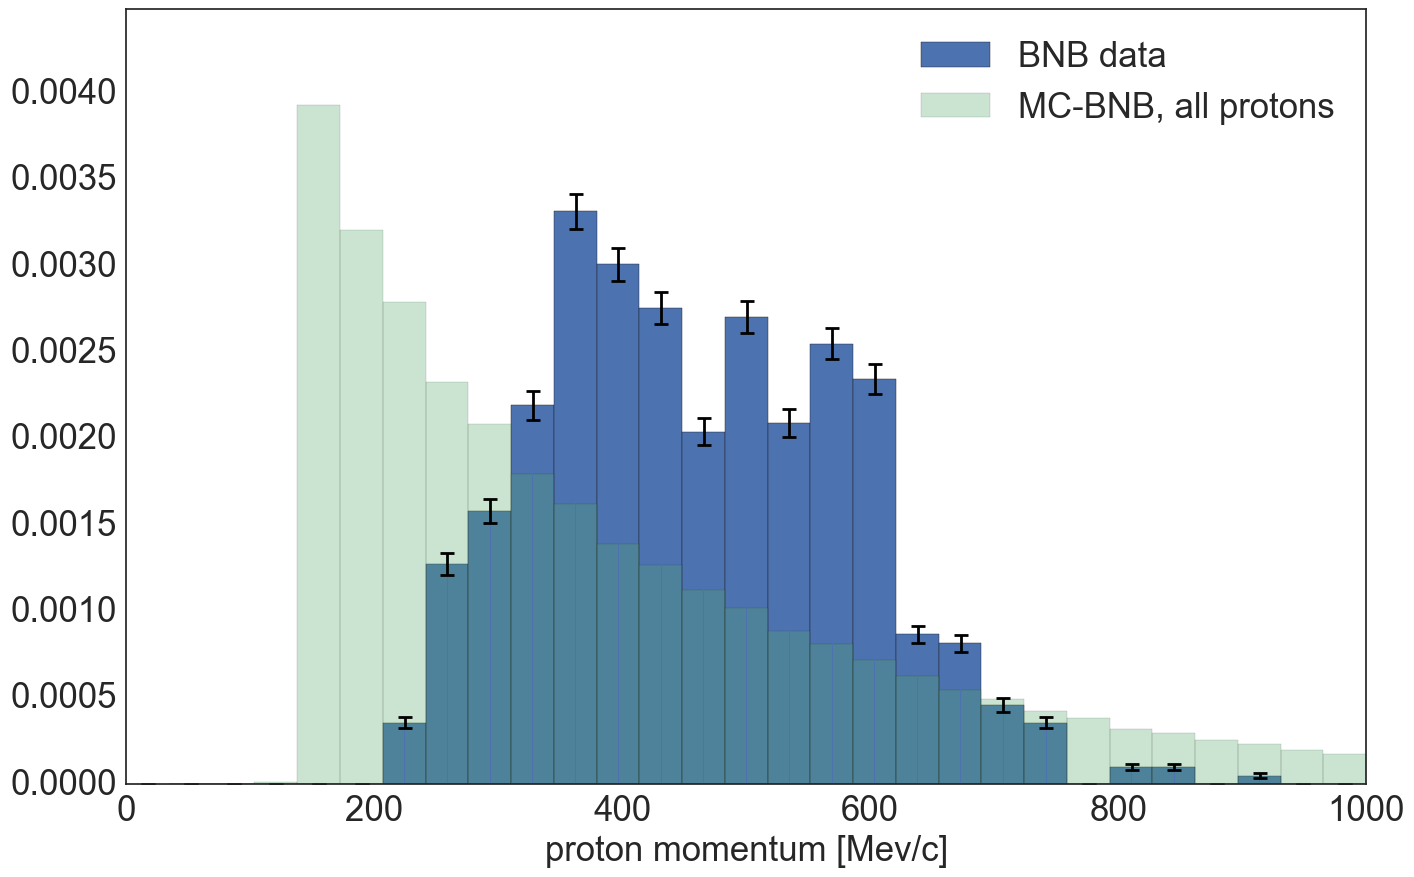

In [27]:
bins=np.linspace(0,1000,30)
ax , h , bins , patches = plot_1d_hist( data.p_P , 
                                       bins=bins ,
                                       xlabel='proton momentum [Mev/c]' , figsize=(16,10)
                                      ,normed=1
                                      ,label='BNB data');
plt.hist(1000*MCBNB_gen_protons.P,bins=bins,normed=1,alpha=0.3,label='MC-BNB, all protons')
mid = 0.5*(bins[1:] + bins[:-1])
ax.bar(mid, h, yerr=np.sqrt(h)/len(data.p_P), linewidth=0,error_kw=dict(ecolor='black', lw=2, capsize=5, capthick=2))
ax.set_ylim(0,1.02*np.max(h+np.sqrt(h)/len(data.p_P))+0.001)
plt.legend(fontsize=25)

(0, 100.40266075469773)

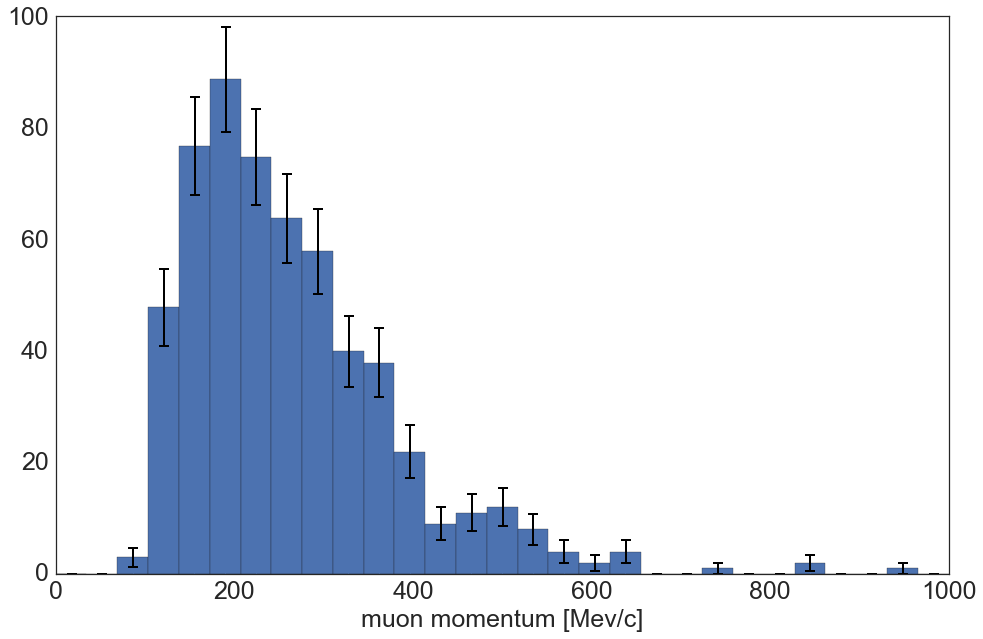

In [4]:
ax , h , bins , patches = plot_1d_hist( data.mu_P , 
                                       bins=np.linspace(0,1000,30) ,
                                       xlabel='muon momentum [Mev/c]' , figsize=(16,10));
mid = 0.5*(bins[1:] + bins[:-1])
ax.bar(mid, h, yerr=np.sqrt(h), linewidth=0,error_kw=dict(ecolor='black', lw=2, capsize=5, capthick=2))
ax.set_ylim(0,1.02*np.max(h+np.sqrt(h)))

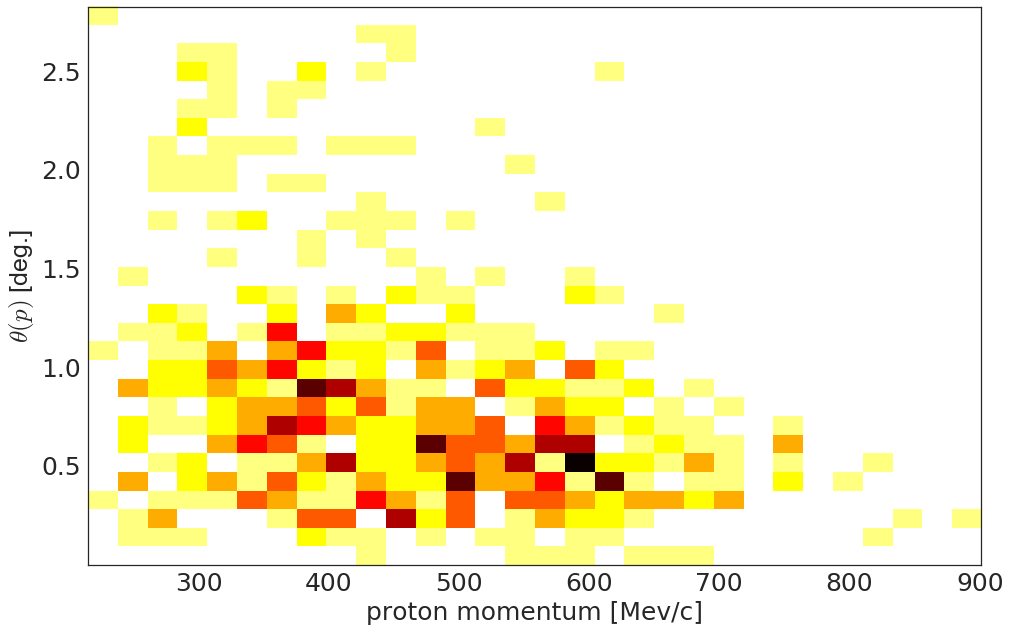

In [47]:
plot_2d_hist( data.p_P , data.p_theta , bins=30 , cmap='hot_r',
             xlabel='proton momentum [Mev/c]' , ylabel='$\\theta(p)$ [deg.]' , 
             figsize=(16,10) , fontsize=25 , weights=None);

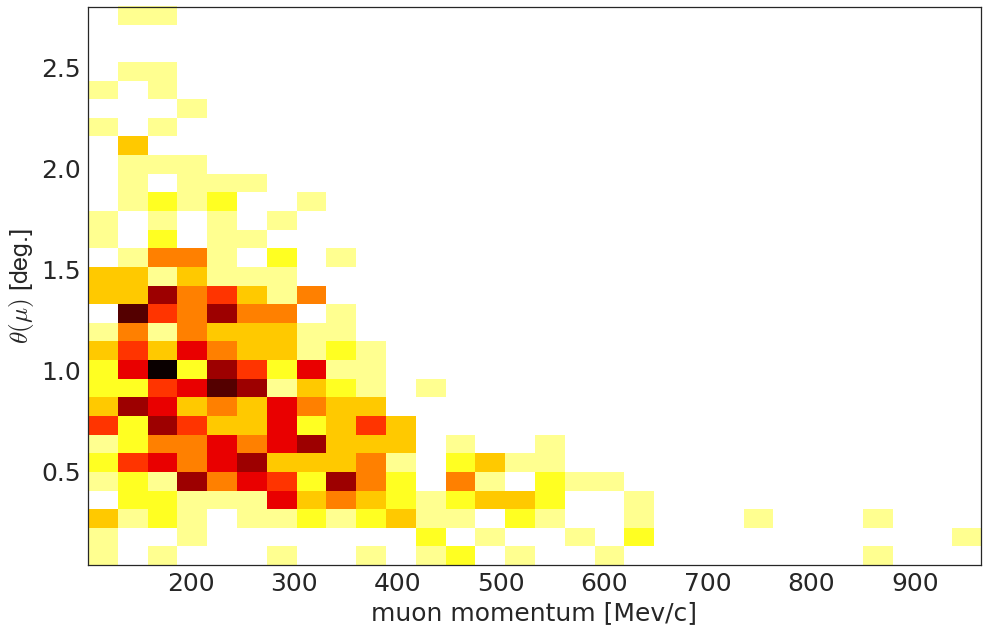

In [48]:
plot_2d_hist( data.mu_P , data.mu_theta , bins=30 , cmap='hot_r',
             xlabel='muon momentum [Mev/c]' , ylabel='$\\theta(\\mu)$ [deg.]' , 
             figsize=(16,10) , fontsize=25 , weights=None);

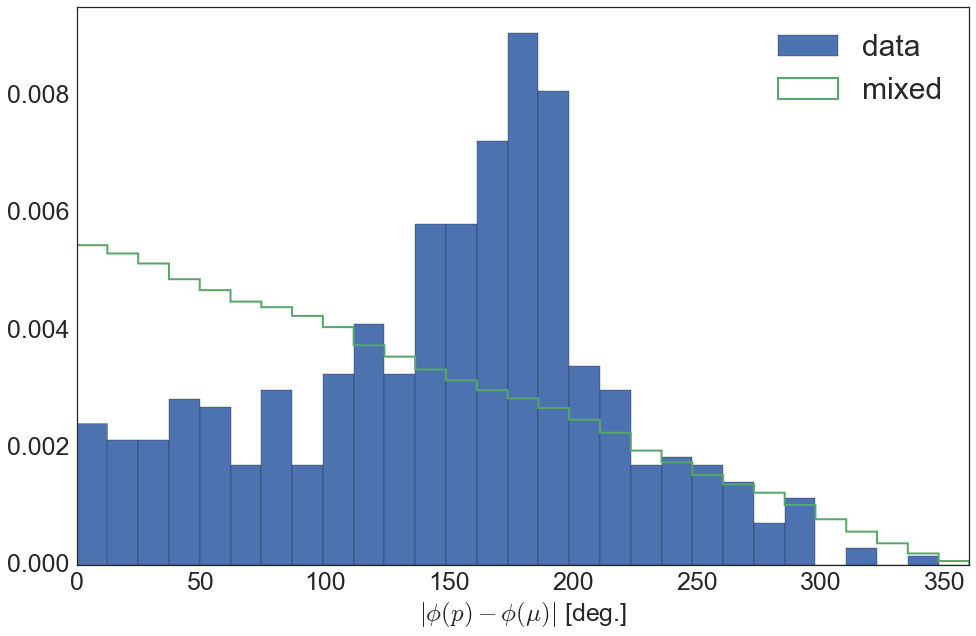

In [17]:
ax , h , bins , patches = plot_1d_hist( 180/3.14*np.abs(data.mu_phi - data.p_phi) ,                                         
                                       bins=np.linspace(0,360,30) ,                                                                              
                                       xlabel='$|\\phi(p)-\\phi(\\mu)|$ [deg.]' ,                                       
                                       label = 'data',
                                       figsize=(16,10),
                                       normed=1);
plt.hist(180/3.14*np.abs(mixed.mu_phi - mixed.p_phi),histtype='step',label='mixed',linewidth=2,normed=1,bins=np.linspace(0,360,30));

mid = 0.5*(bins[1:] + bins[:-1])
# ax.bar(mid, h, yerr=np.sqrt(h), linewidth=0,error_kw=dict(ecolor='black', lw=2, capsize=5, capthick=2))
# ax.set_ylim(0,1.02*np.max(h+np.sqrt(h)))
ax.set_xlim(0,360)
plt.legend(loc='upper right',fontsize=30)